# Feature Engineering
## 1. Imports

In [5]:
pip install googletrans==3.1.0a0

In [6]:
import re
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from googletrans import Translator
from collections import Counter


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## 2. Dataset load

In [7]:
# read the training file and extract genre and plot

input_file = '/content/sample_data/train.txt'

genres = []
plots = []

with open(input_file, 'r', encoding='utf-8') as infile:
    for line in infile:
        # Split the line by tabs
        parts = line.split('\t')

        # Extract genre and plot
        genres.append(parts[2])
        plots.append(parts[4])


# 3. Train test split and Data augmentation

In [8]:
X_train, X_test, Z_train, Z_test = train_test_split(plots, genres, test_size=0.1, random_state=33)

translator = Translator()
aug_X_train = []
aug_Z_train = []
drama_counter = 0

for i in range(len(X_train)):

        # Split the line by tabs

        if Z_train[i] == 'sci-fi':
            # Perform back translation
            translated = translator.translate(X_train[i], src='en', dest='es').text
            back_translated = translator.translate(translated, src='es', dest='en').text

            # Perform synonym replacement
            translated2 = translator.translate(X_train[i], src='en', dest='fr').text
            back_translated2 = translator.translate(translated2, src='fr', dest='en').text

            # Append plots
            aug_X_train.append(X_train[i])
            aug_Z_train.append(Z_train[i])
            aug_X_train.append(back_translated)
            aug_Z_train.append(Z_train[i])
            aug_X_train.append(back_translated2)
            aug_Z_train.append(Z_train[i])


        elif Z_train[i] in {'crime', 'animation'}:
            # Perform back translation
            translated = translator.translate(X_train[i], src='en', dest='es').text
            back_translated = translator.translate(translated, src='es', dest='en').text

            # Append both plots to the specified file
            aug_X_train.append(X_train[i])
            aug_Z_train.append(Z_train[i])
            aug_X_train.append(back_translated)
            aug_Z_train.append(Z_train[i])


        elif (Z_train[i] == 'drama'):
            if (drama_counter < 1000):
                drama_counter += 1
                aug_X_train.append(X_train[i])
                aug_Z_train.append(Z_train[i])

        else:
            aug_X_train.append(X_train[i])
            aug_Z_train.append(Z_train[i])

# 4. Pre-Processing

In [9]:
#porter_stemmer=PorterStemmer()
lemmatizer = WordNetLemmatizer()

#Function to get WordNet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no tag match

#Function to lemmatize sentence with POS tagging
def processSentence(s):
    words = re.split("\s+", s.lower())  # Lowercasing and tokenizing
    pos_tags = nltk.pos_tag(words)  # Get POS tags for each word
    lemmed_words = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in pos_tags]
    return ' '.join(lemmed_words)

def filter_stopwords(tokens):
    aux = [word for word in tokens if word.isalpha() and word not in stop_words] # watch out for isalpha()
    return ' '.join(aux)

#lemmatization and Lowercasing
lemmed_train_plots = [processSentence(plot) for plot in aug_X_train]
lemmed_test_plots = [processSentence(plot) for plot in X_test]
lemmed_og_train_plots = [processSentence(plot) for plot in X_train]


#Tokenizing
tokenized_train_plots = [nltk.wordpunct_tokenize(sp) for sp in lemmed_train_plots]
tokenized_test_plots = [nltk.wordpunct_tokenize(sp) for sp in lemmed_test_plots]
tokenized_og_train_plots = [nltk.wordpunct_tokenize(sp) for sp in lemmed_og_train_plots]

stop_words = set(stopwords.words('english'))

filtered_train_plots = [filter_stopwords(tp) for tp in tokenized_train_plots]
filtered_test_plots = [filter_stopwords(tp) for tp in tokenized_test_plots]
filtered_og_train_plots = [filter_stopwords(tp) for tp in tokenized_og_train_plots]



# 5. Train Test Split

==== Original Dataset ====
==== MultinomialNB ====
Resultados com tfidf
              precision    recall  f1-score   support

      action       0.77      0.32      0.45       113
   animation       1.00      0.22      0.36        60
      comedy       0.80      0.10      0.18       119
       crime       1.00      0.00      0.00        57
       drama       0.28      0.98      0.44       165
      horror       0.75      0.70      0.72       101
     romance       0.82      0.15      0.25        95
      sci-fi       1.00      0.00      0.00        19
     western       0.98      0.62      0.76        76

    accuracy                           0.44       805
   macro avg       0.82      0.34      0.35       805
weighted avg       0.74      0.44      0.40       805



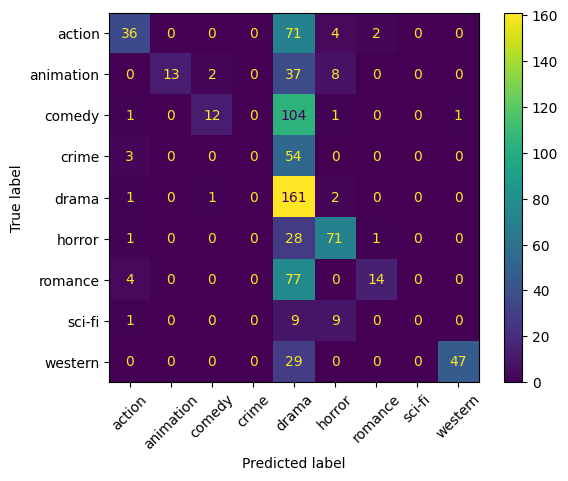

==== SVM ====
Resultados com tfidf
              precision    recall  f1-score   support

      action       0.60      0.67      0.63       113
   animation       0.79      0.62      0.69        60
      comedy       0.60      0.61      0.61       119
       crime       0.57      0.42      0.48        57
       drama       0.56      0.61      0.58       165
      horror       0.81      0.86      0.84       101
     romance       0.55      0.49      0.52        95
      sci-fi       0.58      0.58      0.58        19
     western       0.86      0.91      0.88        76

    accuracy                           0.65       805
   macro avg       0.66      0.64      0.65       805
weighted avg       0.65      0.65      0.65       805



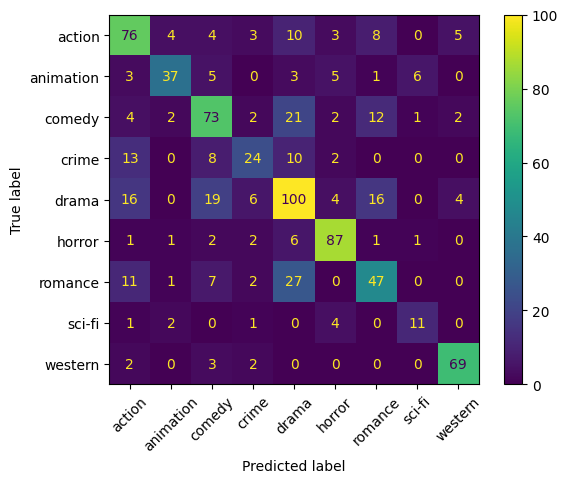

==== Augmented Dataset ====
==== MultinomialNB ====
Resultados com tfidf
              precision    recall  f1-score   support

      action       0.65      0.61      0.63       113
   animation       0.88      0.58      0.70        60
      comedy       0.44      0.74      0.55       119
       crime       0.56      0.53      0.54        57
       drama       0.56      0.33      0.42       165
      horror       0.52      0.93      0.66       101
     romance       0.72      0.40      0.51        95
      sci-fi       0.67      0.21      0.32        19
     western       0.98      0.82      0.89        76

    accuracy                           0.59       805
   macro avg       0.66      0.57      0.58       805
weighted avg       0.63      0.59      0.58       805



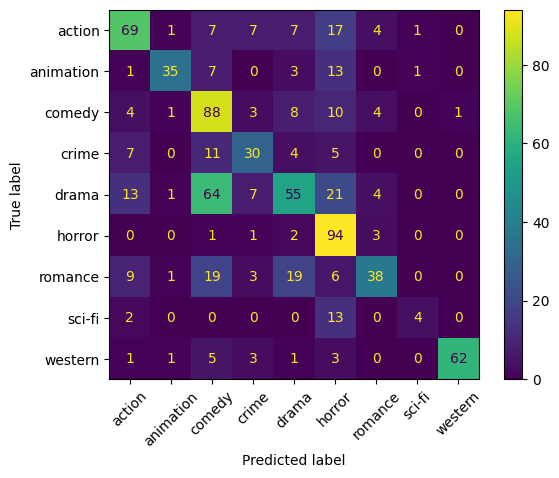

==== SVM ====
Resultados com tfidf
              precision    recall  f1-score   support

      action       0.60      0.65      0.62       113
   animation       0.76      0.63      0.69        60
      comedy       0.57      0.66      0.61       119
       crime       0.52      0.53      0.52        57
       drama       0.59      0.44      0.50       165
      horror       0.79      0.87      0.83       101
     romance       0.52      0.56      0.54        95
      sci-fi       0.56      0.53      0.54        19
     western       0.85      0.93      0.89        76

    accuracy                           0.64       805
   macro avg       0.64      0.64      0.64       805
weighted avg       0.63      0.64      0.63       805



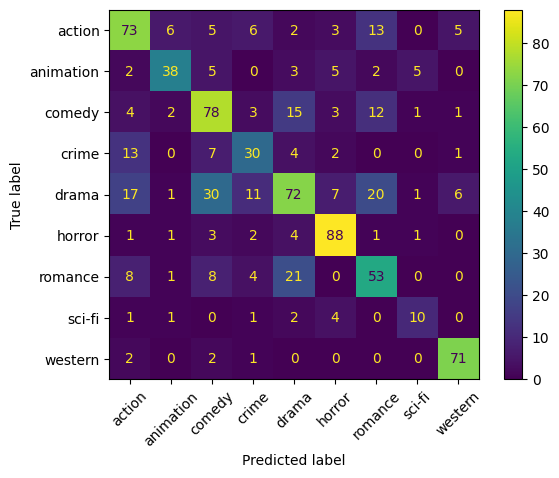

In [10]:
labels = np.unique(genres).tolist()
index = np.arange(len(labels))

train_vectorizer = TfidfVectorizer(min_df = 2)

print("==== Original Dataset ====")

X_train_tfidf = train_vectorizer.fit_transform(filtered_og_train_plots).toarray()
X_test_tfidf = train_vectorizer.transform(filtered_test_plots).toarray()

print("==== MultinomialNB ====")
og_nb = MultinomialNB()

print("Resultados com tfidf")
og_nb.fit(X_train_tfidf, Z_train)
x_pred=og_nb.predict(X_test_tfidf)
print(classification_report(y_pred=x_pred, y_true=Z_test, labels = labels, zero_division=1.))
cm = confusion_matrix(y_pred=x_pred, y_true=Z_test, labels=labels)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


print("==== SVM ====")
og_svm = svm.LinearSVC()

print("Resultados com tfidf")
og_svm.fit(X_train_tfidf, Z_train)
x_pred=og_svm.predict(X_test_tfidf)
print(classification_report(y_pred=x_pred, y_true=Z_test, labels = labels, zero_division=1.))
cm = confusion_matrix(y_pred=x_pred, y_true=Z_test, labels=labels)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


print("==== Augmented Dataset ====")

X_train_tfidf = train_vectorizer.fit_transform(filtered_train_plots).toarray()
X_test_tfidf = train_vectorizer.transform(filtered_test_plots).toarray()

print("==== MultinomialNB ====")
aug_nb = MultinomialNB()

print("Resultados com tfidf")
aug_nb.fit(X_train_tfidf, aug_Z_train)
x_pred=aug_nb.predict(X_test_tfidf)
print(classification_report(y_pred=x_pred, y_true = Z_test, labels = labels, zero_division=1.))
cm = confusion_matrix(y_pred=x_pred, y_true=Z_test, labels=labels)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

print("==== SVM ====")
aug_svm = svm.LinearSVC()

print("Resultados com tfidf")
aug_svm.fit(X_train_tfidf, aug_Z_train)
x_pred=aug_svm.predict(X_test_tfidf)
print(classification_report(y_pred=x_pred, y_true=Z_test, labels = labels, zero_division=1.))
cm = confusion_matrix(y_pred=x_pred, y_true=Z_test, labels=labels)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()



# 6. Balance Test

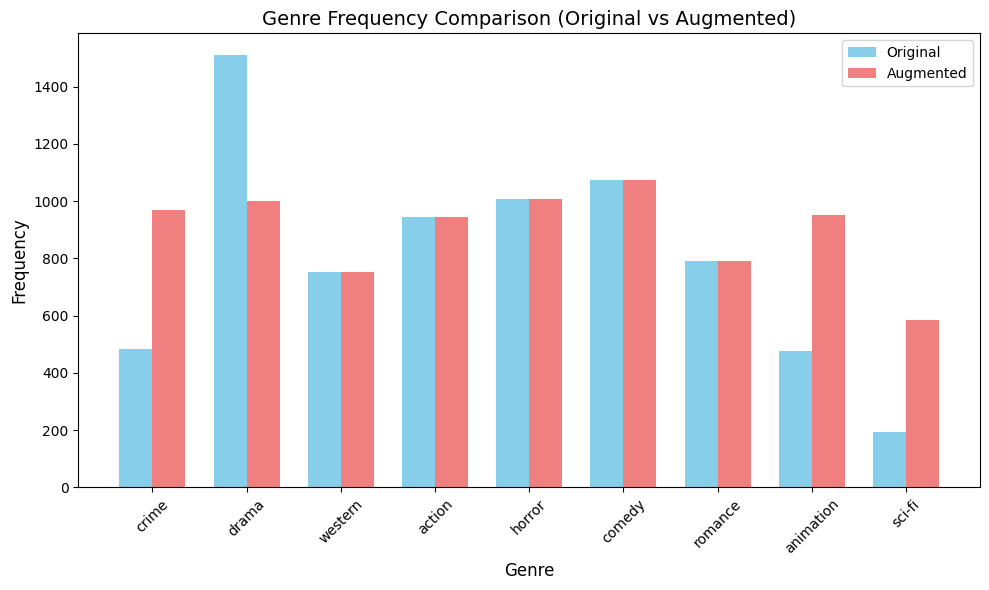

In [11]:
# Count the frequency of each genre using Counter for both datasets
aug_genre_counts = Counter(aug_Z_train)
genre_counts = Counter(Z_train)

# Extract genre names and their respective counts (ensure genres are aligned)
labels = list(genre_counts.keys())
aug_counts = list(aug_genre_counts.values())
counts = list(genre_counts.values())

# Set width of bars and positions
bar_width = 0.35
index = np.arange(len(labels))

# Create a bar plot with two bars per genre
plt.figure(figsize=(10, 6))
plt.bar(index, counts, bar_width, label='Original', color='skyblue')
plt.bar(index + bar_width, aug_counts, bar_width, label='Augmented', color='lightcoral')

# Add titles and labels
plt.title('Genre Frequency Comparison (Original vs Augmented)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(index + bar_width / 2, labels, rotation=45)  # Rotate labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# 7. Label Fitting


In [12]:
# read the test_no_labels.txt file and extract plots

input_file = '/content/sample_data/test_no_labels.txt'
output_file = '/content/sample_data/results.txt'

eval_plots = []

with open(input_file, 'r', encoding='utf-8') as infile:
    for line in infile:
        # Split the line by tabs
        parts = line.split('\t')

        # Extract plots
        eval_plots.append(parts[3])


#lemmatization and Lowercasing
lemmed_eval_plots = [processSentence(plot) for plot in eval_plots]

#Tokenizing
tokenized_eval_plots = [nltk.wordpunct_tokenize(sp) for sp in lemmed_eval_plots]

#Filtering Stopwords
filtered_eval_plots = [filter_stopwords(tp) for tp in tokenized_eval_plots]


X_eval_tfidf = train_vectorizer.transform(filtered_eval_plots).toarray()

eval_pred = aug_svm.predict(X_eval_tfidf)

with open(output_file, 'w', encoding='utf-8') as infile:
    for pred in eval_pred:
      infile.write(pred + '\n')






FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/test_no_labels.txt'